In [1]:
from bokeh.plotting import figure, show
#from bokeh.plotting import output_file
from bokeh.plotting import output_notebook
import numpy as np
%matplotlib inline
import yaml
from scalar_metrics import LoadMetrics

from bokeh.io import output_file
import datetime
t = datetime.datetime.now()
now=t.strftime('%Y%b%d-%H:%M:%S')


In [2]:
output_file('tmp/teste_Foliveira'+now, title='Bokeh Plot')

In [4]:
def name_file(ubr):
    folder = '/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/'
    file_filter =  'ql-snr-'+ubr+'-00000003.yaml'
    print('Loading ',file_filter)
    return folder + file_filter

keys    = []
docs    = []
metrics = []
for i, iname in enumerate(['b0']):
    print(iname)
    stream = open( name_file(iname), "r")
    docs.append( yaml.load(stream) ) 
#     print(docs[i]['METRICS'].keys())
    keys.append( list(docs[i]['METRICS'].keys()) )
    metrics.append(docs[i]['METRICS'])
    #print metrics[-1]['ELG_FITRESULTS'],'\n'

#print metrics[0]['ELG_SNR_MAG'][0][0:3],'\n',metrics[1]['ELG_SNR_MAG'][0][0:3]

b0
('Loading ', 'ql-snr-b0-00000003.yaml')


In [5]:
#from  bokeh.plotting import output_file
from bokeh.models import HoverTool
from bokeh.plotting import ColumnDataSource
#output_notebook()
p = figure(plot_width=400, plot_height=400,title="NAME")

#tools = "pan,wheel_zoom,box_zoom,reset, hover"
i_snr = 14


#print(metrics[0][keys[0][i_snr] ][0][0:3],'\n',metrics[1][keys[0][i_snr]][0][0:3])

color= ['red']
from bokeh.models.glyphs import Circle, Line
p.xaxis.axis_label = 'Mag'
p.yaxis.axis_label = 'SNR'

for ii,iname in enumerate(['r0']):#(['r0','b0']):
    x = metrics[ii][keys[ii][i_snr]][1]
    y = metrics[ii][keys[ii][i_snr]][0]

    source = ColumnDataSource(data=dict(
    x1=x,
    y1=y,
    ))
    
    hover = HoverTool(tooltips=[
         ("data_index", "$index"),
         ("(Mag,SNR)", "($x, $y)")
         ])
    p =  figure(tools = [hover,'pan','wheel_zoom','box_zoom','reset'])

    a, b       = np.polyfit(x,y,1)
    #print a, b
    a2, b2, c2 = np.polyfit(x,y,2)
    xfit = np.linspace(np.min(x), np.max(x),200)
    fit_lin = ColumnDataSource(data = dict( x = xfit, y = a*xfit+ b)  )
    fit_sec = ColumnDataSource(data = dict( x = xfit, y = a2*xfit**2 + b2 *xfit +c2)  )

    p.circle('x1', 'y1', source =source, fill_alpha=0.7, size=7, line_color='black', fill_color=color[ii])         
    p.line('x', 'y', source=fit_lin, line_color="black", line_width= 3, alpha=1.)#color[ii],
    p.line('x', 'y', source=fit_sec, line_color="black", line_dash="10 10", line_width=3, alpha=1.) #color[ii],   

    print ('\n\n== {} ===:\n1st:\ny = {:3.2e} + {:3.2e} *x \n2nd:\ny = {:3.2e} + {:3.2e} *x + {:3.2e} *x**2\n\n'.format(iname,b,a,c2,b2,a2))

    print ('{}\n[{}, {}, {} ]'.format(keys[0][i_snr].replace('_SNR_MAG',''),c2,b2,a2))



== r0 ===:
1st:
y = 1.53e+01 + -6.54e-01 *x 
2nd:
y = 1.68e+02 + -1.44e+01 *x + 3.10e-01 *x**2


ELG
[168.321043878, -14.4296956687, 0.309850437437 ]


In [5]:
show(p)
keys[0][0]

'ELG_FITRESULTS'

In [6]:
source.data = dict(x1=[],y1=[])
t = datetime.datetime.now()
t.strftime('%Y%b%d-%H:%M:%S')

'2017Dec04-00:17:50'

In [10]:
import scalar_metrics

reload(scalar_metrics)
from scalar_metrics import LoadMetrics



In [11]:
cam, exp, night = 'b0', '00000003', '20190101'
print "\n\nTests for the available scalars and using yaml output\n", "="*50
print "TO DO:\n *docs of functions \n *what more else?"
lm = LoadMetrics(cam, exp, night)
print lm.keys_from_scalars('getbias','warn')
print lm.Test_ranges('getbias', 'warn')
print lm.qa_status('countpix')



Tests for the available scalars and using yaml output
TO DO:
 *docs of functions 
 *what more else?
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countpix-b0-00000003.yaml
countpix loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getbias-b0-00000003.yaml
getbias loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getrms-b0-00000003.yaml
getrms loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-xwsigma-b0-00000003.yaml
xwsigma loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countbins-b0-00000003.yaml
countbins loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-integ-b0-00000003.yaml
integ loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skycont-b0-00000003.yaml
skycont loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skypeak-b0-00000003.yaml
skypeak loaded
/home/felipe/quicklook/spectro/red

In [108]:
cam, exp, night = 'z7', '00000003', '20190101'
lm = LoadMetrics(cam, exp, night)
lm.PARTIALstep_color('sn')


/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countpix-z7-00000003.yaml
countpix loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getbias-z7-00000003.yaml
getbias loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getrms-z7-00000003.yaml
getrms loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-xwsigma-z7-00000003.yaml
xwsigma loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countbins-z7-00000003.yaml
countbins loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-integ-z7-00000003.yaml
integ loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skycont-z7-00000003.yaml
skycont loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skypeak-z7-00000003.yaml
skypeak loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skyresid-z7-00000003.yaml
skyresid loaded
/home/felipe/quicklook/spe

"Invalid step: please return a value in ['preproc', 'extract', 'fiberfl', 'skysubs']"

In [109]:
lm.PARTIALstep_color('preproc')

#??LoadMetrics

Steps_status: ['ALARM', 'NORMAL', 'ALARM']
red


'red'

In [13]:
# testing 02: 
print '\nEvaluated here:\n' 
my_metrics = lm.metrics
#print my_metrics
for i in lm.metric_qa_list:
    print '{}: \t{}'.format(i, lm.qa_status(i) )
    
print '\n\nFrom QL file:'
#Reading form yaml files
for j in list(my_metrics):
    for jj in list(my_metrics[j]):
        if '_ERR' in jj:
            print 'In %s \t'%(j),
            print '{}:\t {}'.format(jj, my_metrics[j][jj])


Evaluated here:

getbias: 	NORMAL
getrms: 	ALARM
skycont: 	NORMAL
countbins: 	ALARM
countpix: 	ALARM
snr: 	ALARM


From QL file:
In getrms 	RMSDIFF_ERR:	 ALARM
In skycont 	SKYCONT_ERR:	 NORMAL
In xwsigma 	SHIFT_ERR:	 NORMAL
In countbins 	NGOOD_ERR:	 ALARM
In skypeak 	SUMCOUNT_ERR:	 ALARM
In countpix 	NPIX_ERR:	 ALARM
In getbias 	BIASDIFF_ERR:	 NORMAL
In integ 	MAGDIFF_ERR:	 NORMAL


In [40]:
steps_dic = {'preproc':['countpix', 'getbias','getrms','wsigma', 'xsigma'],
              'extract':['countbins'],
              'fiberfl':['integ', 'skycont', 'skypeak', 'skyresid'],
              'skysubs':['snr']}
steps_list = ['preproc', 'extract', 'fiberfl', 'skysub']

PARTIALsteps_dic = {'preproc':['countpix', 'getbias','getrms'],
              'extract':['countbins'],
              'fiberfl':['skycont'],
              'skysubs':['snr']}

In [42]:
steps_status = []
for i in PARTIALsteps_dic['skysubs']:
    steps_status.append(lm.qa_status(i))
print steps_status
    
if any( x == 'ALARM'  for x in steps_status):
    color =  "red"
elif any( x == 'WARN'  for x in steps_status):
    color =  "yellow"
elif all(x=='NORMAL' for x in steps_status): #intetionaly redundant
    color = "green"
print color

['ALARM']
red


In [45]:
def PARTIALstep_color(step_name):
    steps_list = ['preproc', 'extract', 'fiberfl', 'skysubs']
    if not isinstance(step_name, str): return "{} is not a String".format(step_name)
    if step_name not in steps_list:
        return "Invalid step: please return a value in {}".format(steps_list)
    
    PARTIALsteps_dic = {'preproc':['countpix', 'getbias','getrms'],
              'extract':['countbins'],
              'fiberfl':['skycont'],
              'skysubs':['snr']}
    steps_status = []
    for i in PARTIALsteps_dic[step_name]:
        steps_status.append(lm.qa_status(i))
    
    if any( x == 'ALARM'  for x in steps_status):
        color =  "red"
    elif any( x == 'WARN'  for x in steps_status):
        color =  "yellow"
    elif all(x=='NORMAL' for x in steps_status): #intetionaly redundant
        color = "green"
    return color

    

In [47]:
PARTIALstep_color('skysubs')

'red'

In [110]:
metrics, tests  = lm.Load_metrics_n_tests('snr')

/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countpix-z7-00000003.yaml
countpix loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getbias-z7-00000003.yaml
getbias loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getrms-z7-00000003.yaml
getrms loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-xwsigma-z7-00000003.yaml
xwsigma loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countbins-z7-00000003.yaml
countbins loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-integ-z7-00000003.yaml
integ loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skycont-z7-00000003.yaml
skycont loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skypeak-z7-00000003.yaml
skypeak loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skyresid-z7-00000003.yaml
skyresid loaded
/home/felipe/quicklook/spe

In [111]:
lm.qa_name
steps_dic = {'preproc':['countpix', 'getbias','getrms','wsigma', 'xsigma'],
              'extract':['countbins'],
              'fiberfl':['integ', 'skycont', 'skypeak', 'skyresid'],
              'skysubs':['snr']}

['countpix',
 'getbias',
 'getrms',
 'xwsigma',
 'countbins',
 'integ',
 'skycont',
 'skypeak',
 'skyresid',
 'snr']

[preproc](preproc.ipynb)

[extract](extract.ipynb)

[fiber flattening](fiberfl.ipynb)


In [112]:
countpix  = metrics['countpix']
getbias   = metrics['countpix']
getrms    = metrics['getrms']
xwsigma   = metrics['xwsigma']
countbins = metrics['countbins']
integ     = metrics['integ']
skycont   = metrics['skycont']
skypeak   = metrics['skypeak']
skyresid  = metrics['skyresid']
snr       = metrics['snr']

In [161]:
# countpix
def explorer(name):
    print '* {} *'.format(name)
    x = metrics[name]
    for i in x.viewkeys():
        try:
            print 'List : {} {}'.format( i, len(x[i]))
            #if len(x[i]) == 2:
            #    print '  \t\t {} {} '.format(len(x[i])[0], len(x[i])[1])
        except:
            print 'float: {} {}'.format( i,  x[i])

def explorer_test(name):
    print '\ntests',name
    x = tests[name]
    for i in x.viewkeys():
        try:
            print 'List : {} {}'.format( i, len(x[i]))
            #if len(x[i]) == 2:
            #    print '  \t\t {} {} '.format(len(x[i])[0], len(x[i])[1])
        except:
            print 'float: {} {}'.format( i,  x[i])
    print '---'*8, '\n' 

    
steps_dic_from_file = {'preproc':['countpix', 'getbias','getrms','xwsigma'],
              'extract':['countbins'],
              'fiberfl':['integ', 'skycont', 'skypeak', 'skyresid'],
              'skysubs':['snr']}
steps_list = ['preproc', 'extract', 'fiberfl', 'skysubs']

In [232]:
print( integ['STD_FIBERID'], integ['INTEG'])#, skyresid['SKY_FIBERID']

([34, 55, 66, 85, 86, 136, 254, 384, 424, 430, 436], [2182938.5718817986, 9865219.87316161, 5699734.134236759, 2852684.537762544, 4140503.057230648, 1967703.0653401848, 3445697.726051213, 906527.1130574653, 8882847.874846507, 1927591.3404064777, 2544441.891798437])


In [210]:
for j in list(steps_dic_from_file.viewkeys()):
    print '** {} **'.format(j) 
    for i in steps_dic_from_file[j]:
        explorer(i)
        explorer_test(i)
    print '===='*8,'\n'

** preproc **
* countpix *
List : NPIX_LOW_AMP 4
List : NPIX_HIGH_AMP 4
List : NPIX_ERR 5
float: NPIX_LOW 322456
float: NPIX_HIGH 38020

tests countpix
List : NPIX_ALARM_RANGE 2
float: CUTHI 10
List : NPIX_WARN_RANGE 2
float: CUTLO 3
------------------------ 

* getbias *
float: DATA5SIG 2
List : BIASDIFF_ERR 6
List : BIAS_AMP 4
float: DIFF1SIG 0.029
float: BIAS 0.147527060821
float: DIFF3SIG 0.037
float: DIFF2SIG 0.034
List : MEANBIAS_ROW 4128

tests getbias
List : DIFF_ALARM_RANGE 2
List : PERCENTILES 3
List : DIFF_WARN_RANGE 2
------------------------ 

* getrms *
List : RMS_OVER_AMP 4
float: RMS 6.76760789808
float: RMS_OVER 9.09711577
List : EXPNUM_WARN 0
List : RMSDIFF_ERR 5
List : RMS_ROW 8256
List : RMS_AMP 4

tests getrms
List : RMS_ALARM_RANGE 2
List : RMS_WARN_RANGE 2
------------------------ 

* xwsigma *
List : XSHIFT_FIB 0
List : XSHIFT_AMP 1
List : WSHIFT_AMP 1
List : SHIFT_ERR 6
float: XSHIFT 0.0
float: XSIGMA_MED 1.21077348938
float: XSIGMA_MED_SKY 1.21077348938
List :

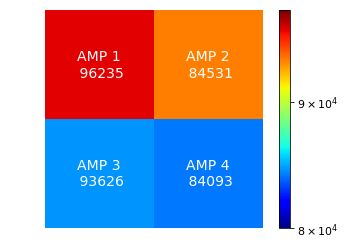

In [297]:
#preproc

grid =np.array([[0,1],[0,1]])
fig, ax = plt.subplots()
to_plot=np.array(countpix['NPIX_LOW_AMP']).reshape(2,2)
im = ax.imshow(to_plot, cmap=cm.jet, interpolation='nearest',norm=LogNorm(vmin=8.0e4, vmax=9.8e4) )

ax.axis('off')
for (j, i), _ in np.ndenumerate(grid):
    label = 'AMP {}\n {}'.format(i+j+j+1, to_plot[i,j])
    ax.text(i,j,label,ha='center',va='center', color='white', fontsize=14)
    
#pyplot.show() 
#ax.set_yticks()
cb = plt.colorbar(im,ax=ax)
cb.ax.tick_params(labelsize=11)


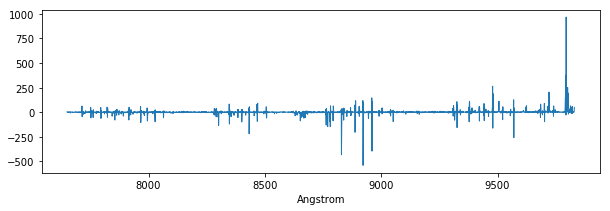

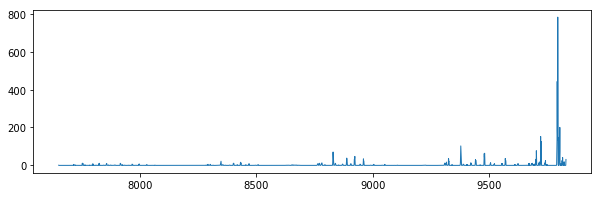

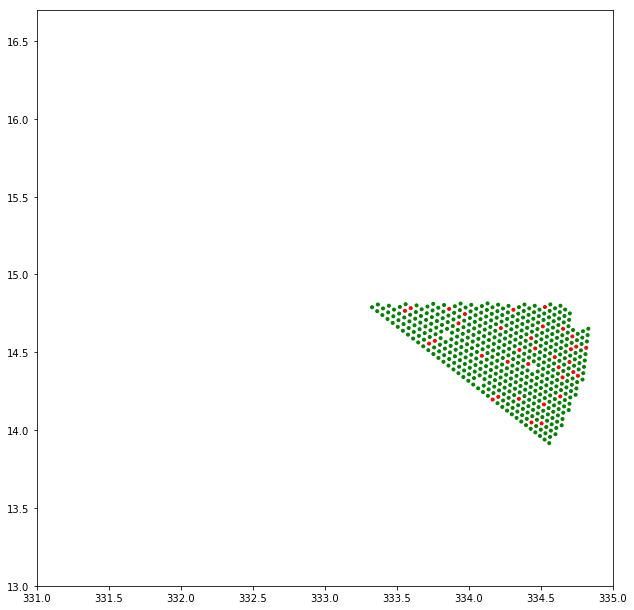

In [298]:
#skyresid

plt.figure(figsize=(10,3))
plt.plot(skyresid['WAVELENGTH'], skyresid['MED_RESID_WAVE'], linewidth =1)
plt.xlabel('Angstrom')
plt.show() ; plt.close()

plt.figure(figsize=(10,3))
plt.plot(skyresid['WAVELENGTH'], skyresid['WAVG_RES_WAVE'], linewidth =1)
ax.set_xlabel('Angstrom')
plt.show() ; plt.close()



fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=False)
ax.set_xlim(331,335)
ax.set_ylim(13,16.7)


bad = skyresid['SKY_FIBERID']
#countbins['RA'][0]
col, mark =[],[]
for x in range(500):
    if x in bad:
        col.append('red')
        mark.append('s')
    else:
        col.append('green')
        mark.append('.')

ax.scatter(skyresid['RA'], skyresid['DEC'], c= col, marker=".")
#ax.scatter(countbins['RA'], countbins['DEC'][bad], c=, marker=".")

plt.show(); plt.close()


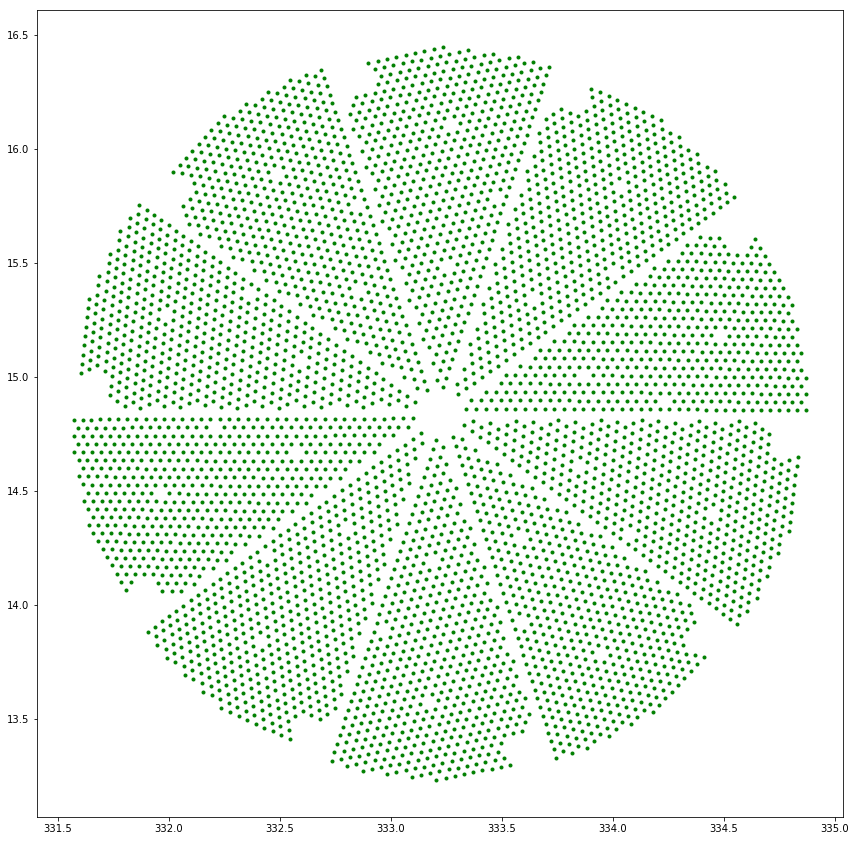

In [233]:
#COUNTBINS
ra  = [x/180.0*3.141593 for x in countbins['RA']]

fig = plt.figure(figsize=(14, 14))
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=False)
ax.scatter(countbins['RA'], countbins['DEC'], c='green', marker=".")

plt.show(); plt.close()


### =====================

In [116]:
# 3) getrms
#

print len(metrics['getrms']['RMS_ROW'])
getrms = metrics['getrms']
print getrms['RMS']
getrms_keys = list(metrics['getrms'].viewkeys() )
for i in getrms_keys:
    try:
        print i, len(getrms[i])
    except:
        print 'val', i,  getrms[i]

8256
6.76760789808
RMS_OVER_AMP 4
RMS val RMS 6.76760789808
RMS_OVER val RMS_OVER 9.09711577
EXPNUM_WARN 0
RMSDIFF_ERR 5
RMS_ROW 8256
RMS_AMP 4


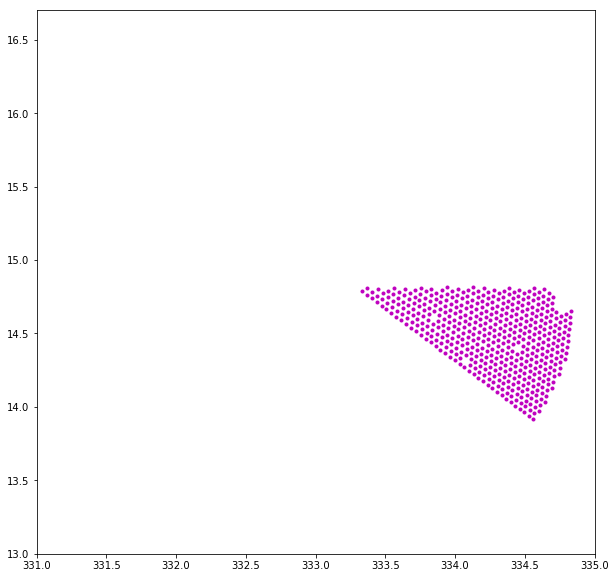

In [141]:

# snr

import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

plt.xlim(331,335)
plt.ylim(13,16.7)
color = 'm' if cam[0]=='z' else cam[0]
plt.scatter(snr['RA'], snr['DEC'], c=color, marker='.', )
